In [1]:
import pandas as pd
import numpy as np


In [2]:

# Load the metrics tsv file where the first line is the header
df = pd.read_csv('C:/Users/aslak/Master/Github_first/Master/data/salmon/combined_performance_metrics.tsv', sep='\t| ', engine="python", index_col=False)
#df = pd.read_csv('C:/Users/aslak/Master/Github_first/Master/data/salmon/combined_performance_metrics.tsv', sep='\t', header=None)


C:\Users\aslak\AppData\Local\Temp\ipykernel_15772\2733389591.py:2: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df = pd.read_csv('C:/Users/aslak/Master/Github_first/Master/data/salmon/combined_performance_metrics.tsv', sep='\t| ', engine="python", index_col=False)


In [14]:
# print the first row
#print(df.head(1))


# Remove "AS-TAC-peaks/AtlanticSalmon_ATAC_" and ".mLb.clN_peaks.narrowPeak" from the column names
df.columns = df.columns.str.replace('AS-TAC-peaks/AtlanticSalmon_ATAC_', '')
df.columns = df.columns.str.replace('.mLb.clN_peaks.narrowPeak', '')

df.shape

(100, 65)

In [4]:
# sort rows to num_cnns
df = df.sort_values(by='num_cnns')

# Melt the DataFrame
df_melted = pd.melt(df, id_vars=['num_cnns', 'metric'])


C:\Users\aslak\AppData\Local\Temp\ipykernel_15772\2492881467.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_melted, x='num_cnns', y='value', hue='tissue', style='metric', palette='deep', ci=None)


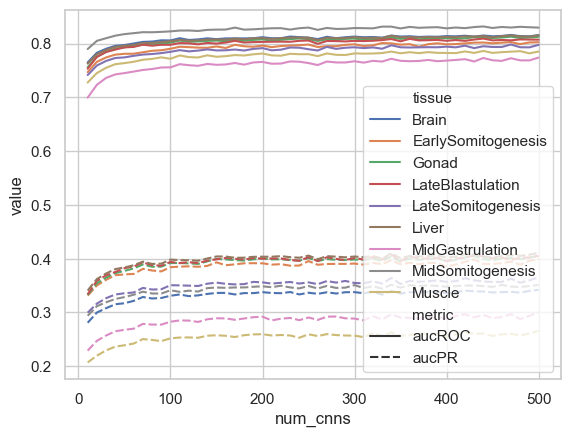

In [13]:
#plot the pivot_df, num cnns vs value
import matplotlib.pyplot as plt 
import seaborn as sns
# make a new column that is the first word before "_" in the variable column
df_melted['tissue'] = df_melted['variable'].str.split('_').str[0]
# do not color anything else than the lines in the sns.lineplot
#sns.set(style='whitegrid')
# can you color the lines in the sns.lineplot by the tissue column and also have a difference by color?
sns.set(style='whitegrid')
#sns.lineplot(data=df_melted, x='num_cnns', y='value', hue='tissue')
#sns.lineplot(data=df_melted, x='num_cnns', y='value', hue='tissue', palette='deep')
#sns.lineplot(data=df_melted, x='num_cnns', y='value', hue='tissue', palette='deep', style='metric')
#sns.lineplot(data=df_melted, x='num_cnns', y='value', hue='metric', color='tissue')
# I want to plot different lines for each "tissue" with different colors, also I want to have a different line type for "metric"
sns.lineplot(data=df_melted, x='num_cnns', y='value', hue='tissue', style='metric', palette='deep', errorbar=None)
plt.show()